In [1]:
#!pip install transformers --upgrade --no-deps
#!pip install protein-bert --no-deps
#!pip install tensorflow_addons
# !pip install torch
# !pip install --upgrade jupyter
# !pip install --upgrade  ipywidgets
#import tensorflow as tf
#!pip install pandas
#!pip install matplotlib
# !pip install seaborn
# !pip install tqdm
# !pip install biopandas
#!pip3 install Bio

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
#import tensorflow as tf
from tqdm import tqdm

In [2]:
os.getcwd()

'/Users/samuelchazy/ML_files_X/Applied_Projects/Competitions/Kaggle/Novozymes_Enzymes_stability'

# Get the files & drop null values

In [3]:
file_1='code/data/train.csv'
file_2='code/data/train_updates_20220929.csv'

In [4]:
df_one = pd.read_csv(file_1)
df_one

seq_id                                   protein_sequence   pH  \
0           0  AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0   
1           1  AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0   
2           2  AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0   
3           3  AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...  7.0   
4           4  AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...  7.0   
...       ...                                                ...  ...   
31385   31385  YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...  7.0   
31386   31386  YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...  7.0   
31387   31387  YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...  7.0   
31388   31388  YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...  7.0   
31389   31389  YYVPDEYWQSLEVAHKLTFGYGYLTWEWVQGIRSYVYPLLIAGLYK...  7.0   

                             data_source    tm  
0      doi.org/10.1038/s41592-020-0801-4  75.7  
1      doi.org/10.1038/s41592-020-0801-4  50.5  
2      doi.org/10.1038/s41592-020-0801-4  40.5  
3      doi.org/10.1038/s41592-020-0801-4  47.2  
4      doi.org/10.1038/s41592-020-0801-4  49.5  
...                                  ...   ...  
31385  doi.org/10.1038/s41592-020-0801-4  51.8  
31386  doi.org/10.1038/s41592-020-0801-4  37.2  
31387  doi.org/10.1038/s41592-020-0801-4  64.6  
31388  doi.org/10.1038/s41592-020-0801-4  50.7  
31389  doi.org/10.1038/s41592-020-0801-4  37.6  

[31390 rows x 5 columns]

In [5]:
df_two = pd.read_csv(file_2)
df_two = df_two.dropna(subset='protein_sequence')
df_two

seq_id                                   protein_sequence   pH  \
25       973  DTSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  7.0   
28       986  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVTFQNRESVLPT...  7.0   
29       988  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPT...  7.0   
30       989  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPT...  5.5   
33      1003  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESTLPT...  7.0   
38      1012  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  7.0   
39      1014  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  5.5   
40      1018  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  7.0   
46      1037  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  7.0   
47      1042  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  7.0   
57      1079  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  5.5   
58      1081  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  7.0   
59      1088  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  7.0   
60      1093  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  7.0   
61      1096  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  7.0   
62      1098  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  7.0   
63      1100  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  5.5   
64      1108  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRKSVLPT...  7.0   
65      1111  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRKSVLPT...  5.5   
66      1120  DVSGTVCLSALPPEATDVLNLIASDGPFPYSQDGVVFQNRESVLPT...  7.0   
68      1122  DVSGTVCLSALPPEAVDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  7.0   
69      1125  DVSGVVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  7.0   
965    13447  MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...  2.7   
966    13449  MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...  2.7   
1079   14640  MKMSRLCLSVALLVLLGTLAASTPGCDTSNQAKAQRPDFCLEPPYT...  7.0   

      data_source    tm  
25            NaN  48.4  
28            NaN  48.4  
29            NaN  49.0  
30            NaN  55.6  
33            NaN  48.4  
38            NaN  48.4  
39            NaN  55.6  
40            NaN  49.0  
46            NaN  49.0  
47            NaN  48.4  
57            NaN  55.6  
58            NaN  49.0  
59            NaN  48.4  
60            NaN  48.4  
61            NaN  48.4  
62            NaN  48.4  
63            NaN  55.6  
64            NaN  49.0  
65            NaN  55.6  
66            NaN  48.4  
68            NaN  48.4  
69            NaN  48.4  
965           NaN  64.9  
966           NaN  64.9  
1079          NaN  39.0

### Test data

In [6]:
file_3 = 'code/data/test.csv'
df_test = pd.read_csv(file_3)
df_test = df_test.drop('data_source', axis=1)

df_test

seq_id                                   protein_sequence  pH
0      31390  VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8
1      31391  VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8
2      31392  VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...   8
3      31393  VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...   8
4      31394  VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...   8
...      ...                                                ...  ..
2408   33798  VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8
2409   33799  VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8
2410   33800  VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8
2411   33801  VPVNPEPDATSVENVPLKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8
2412   33802  VPVNPEPDATSVENVWLKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8

[2413 rows x 3 columns]

In [7]:
file_sample = 'code/data/sample_submission.csv'
sample_df = pd.read_csv(file_sample).drop('tm',axis=1)
sample_df

seq_id
0      31390
1      31391
2      31392
3      31393
4      31394
...      ...
2408   33798
2409   33799
2410   33800
2411   33801
2412   33802

[2413 rows x 1 columns]

# DB file

In [8]:
from biopandas.pdb import PandasPdb

file_4 = 'code/data/wildtype_structure_prediction_af2.pdb'
wild_structure = PandasPdb().read_pdb(file_4)

In [9]:
atom_structure = wild_structure.df['ATOM'].drop(['record_name','atom_number','blank_1','blank_2','blank_3','blank_4','alt_loc','segment_id','charge','insertion','chain_id','occupancy','line_idx'],axis=1)
atom_structure

atom_name residue_name  residue_number  x_coord  y_coord  z_coord  \
0            N          VAL               1   34.064   -6.456   50.464   
1            H          VAL               1   33.576   -6.009   51.228   
2           H2          VAL               1   33.882   -7.449   50.477   
3           H3          VAL               1   35.060   -6.323   50.566   
4           CA          VAL               1   33.643   -5.877   49.162   
...        ...          ...             ...      ...      ...      ...   
3312        NZ          LYS             221    4.616   13.323   -4.301   
3313       HZ1          LYS             221    5.270   12.565   -4.432   
3314       HZ2          LYS             221    4.585   13.517   -3.310   
3315       HZ3          LYS             221    4.965   14.143   -4.776   
3316       OXT          LYS             221    1.511   13.763  -11.203   

      b_factor element_symbol  
0        45.11              N  
1        45.11              H  
2        45.11              H  
3        45.11              H  
4        45.11              C  
...        ...            ...  
3312     93.80              N  
3313     93.80              H  
3314     93.80              H  
3315     93.80              H  
3316     93.80              O  

[3317 rows x 8 columns]

# Merge the files

In [10]:
df_train = df_one.copy()

In [11]:
for i,row_one in enumerate(df_one['seq_id'].values):
    for j,row_two in enumerate(df_two['seq_id'].values):
        if row_one == row_two:
            df_train.iloc[i, :] = df_two.iloc[j, :]

# Check the data

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31390 entries, 0 to 31389
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            31390 non-null  int64  
 1   protein_sequence  31390 non-null  object 
 2   pH                31104 non-null  float64
 3   data_source       28043 non-null  object 
 4   tm                31390 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [13]:
df_train.describe()

seq_id            pH            tm
count  31390.000000  31104.000000  31390.000000
mean   15694.500000      6.856534     49.183202
std     9061.656811      1.009352     13.957499
min        0.000000      1.990000     -1.000000
25%     7847.250000      7.000000     42.100000
50%    15694.500000      7.000000     48.000000
75%    23541.750000      7.000000     53.800000
max    31389.000000     53.400000    130.000000

In [14]:
df_train.duplicated().sum()

0

# Replace null values

In [15]:
df_train.isna().sum()

seq_id                 0
protein_sequence       0
pH                   286
data_source         3347
tm                     0
dtype: int64

In [16]:
df_train['pH'] = df_train['pH'].fillna(df_train['pH'].mean())

# Drop data_source column

In [17]:
df_train = df_train.drop('data_source', axis=1)
df_train.head(3)

seq_id                                   protein_sequence   pH    tm
0       0  AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0  75.7
1       1  AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0  50.5
2       2  AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0  40.5

# Univariate graphs

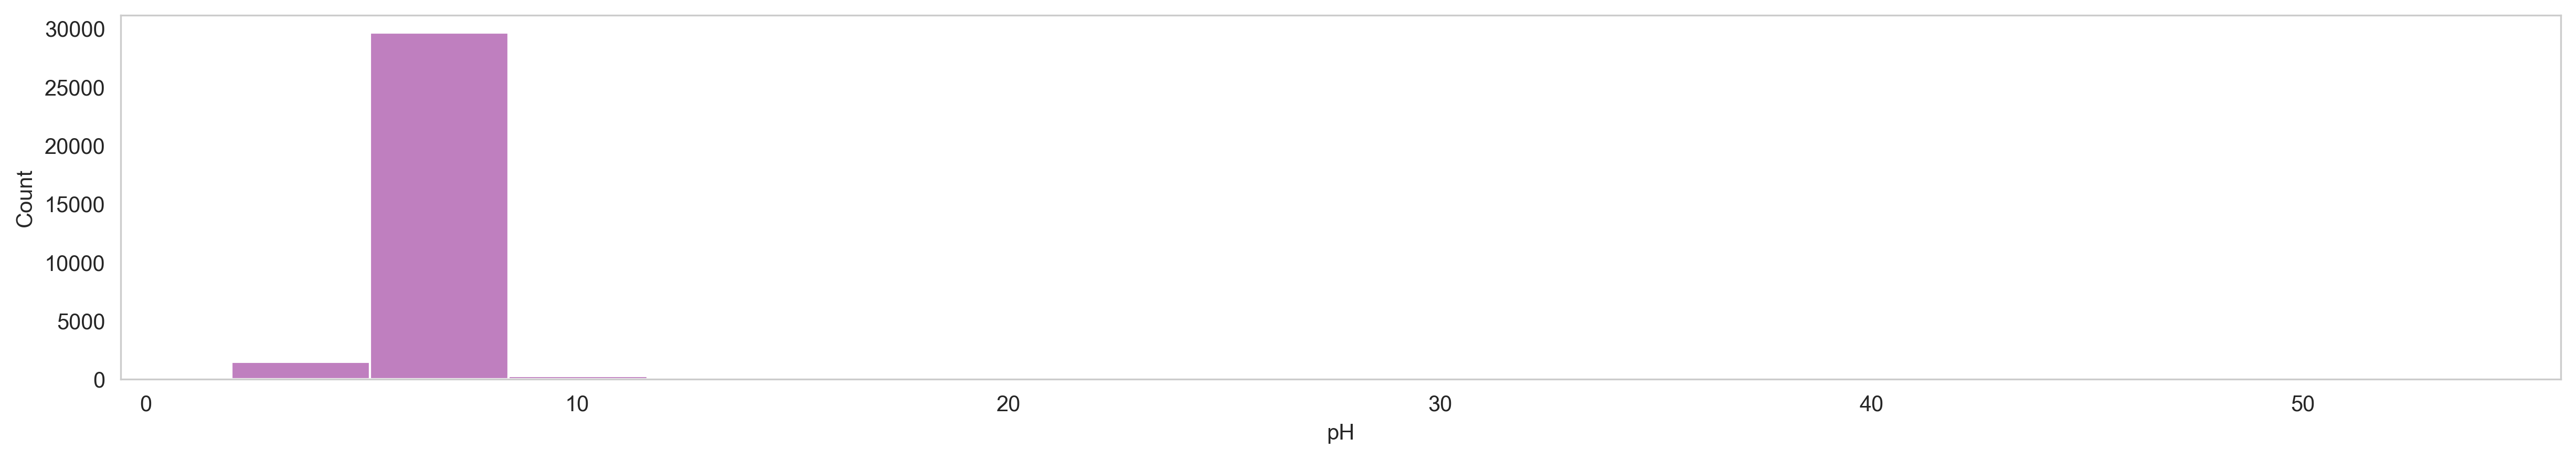

In [19]:
ax,fig = plt.subplots(figsize=(20,3),dpi=300)
ax = sns.histplot(x=df_train['pH'],color='purple',alpha=0.5)
plt.grid();

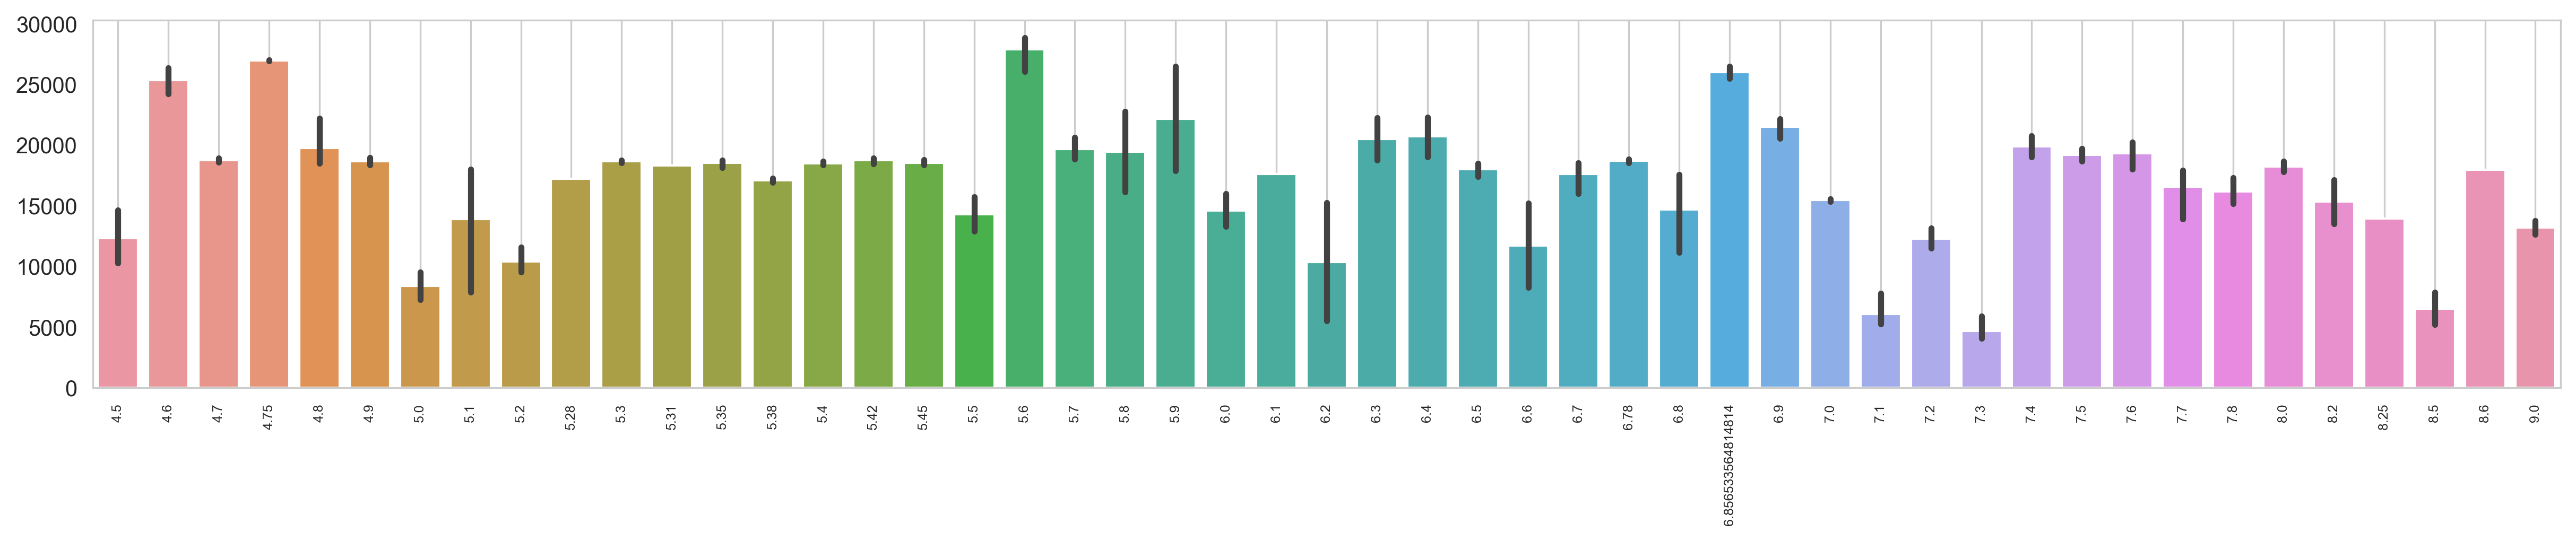

In [48]:
ax,fig = plt.subplots(figsize=(20,3),dpi=300)
ax = sns.barplot(x=df_train['pH'].values,y=df_train['pH'].index)
plt.xticks(fontsize=6,rotation=90)
plt.grid();

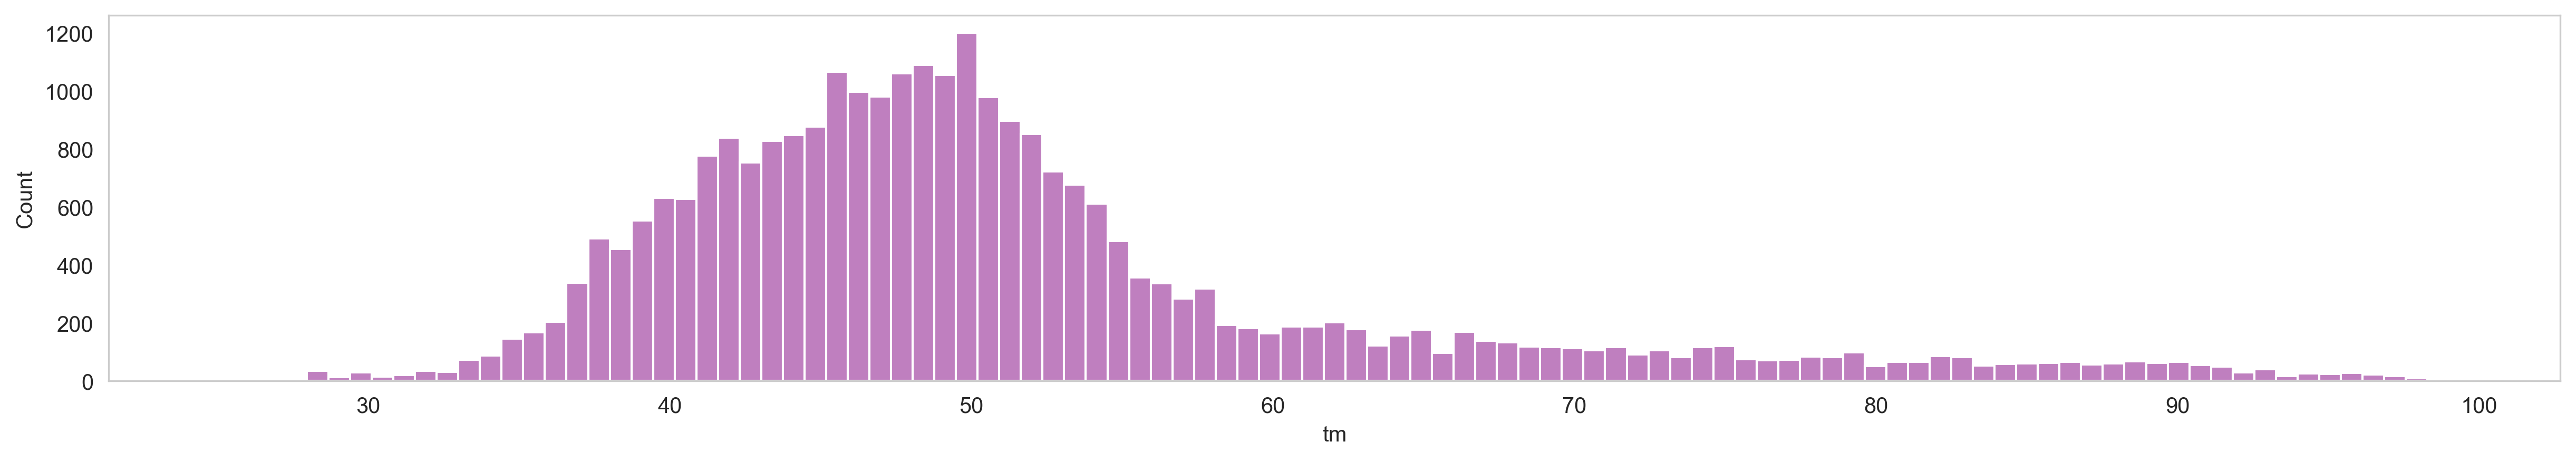

In [44]:
ax,fig = plt.subplots(figsize=(20,3),dpi=300)
ax = sns.histplot(x=df_train['tm'],color='purple',alpha=0.5)
plt.grid();

# Drop outliers

In [49]:
df_train = df_train[(df_train['tm'] < 100) & (df_train['tm'] > 25)]

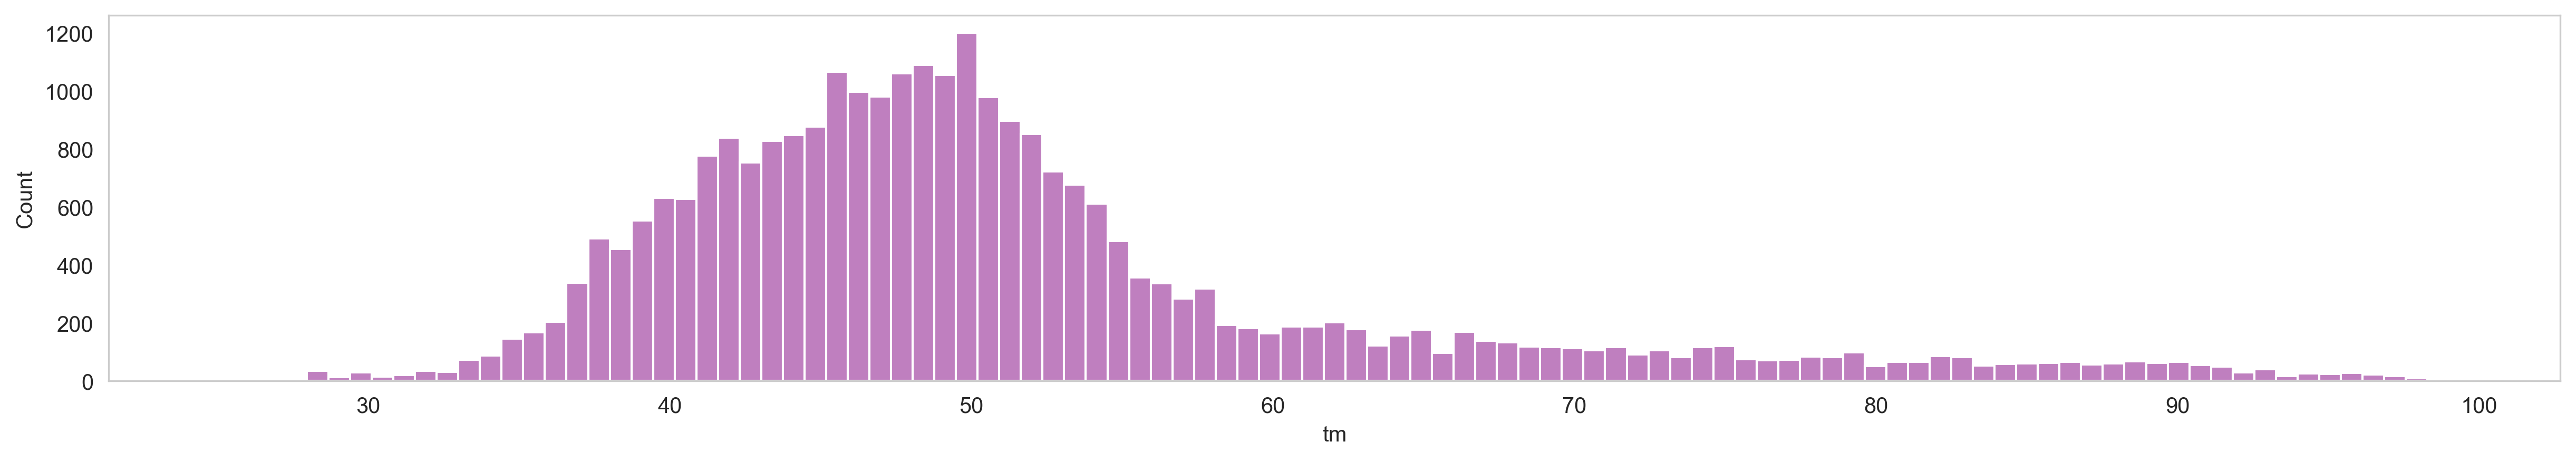

In [50]:
ax,fig = plt.subplots(figsize=(20,3),dpi=300)
ax = sns.histplot(x=df_train['tm'],color='purple',alpha=0.5)
plt.grid();

In [51]:
lower_bound = df_train['pH'].mean() - 3*df_train['pH'].std()
higher_bound = df_train['pH'].mean() + 3*df_train['pH'].std()
df_train = df_train[(df_train['pH'] > lower_bound) & (df_train['pH'] < higher_bound)]

# Multivariate graphs

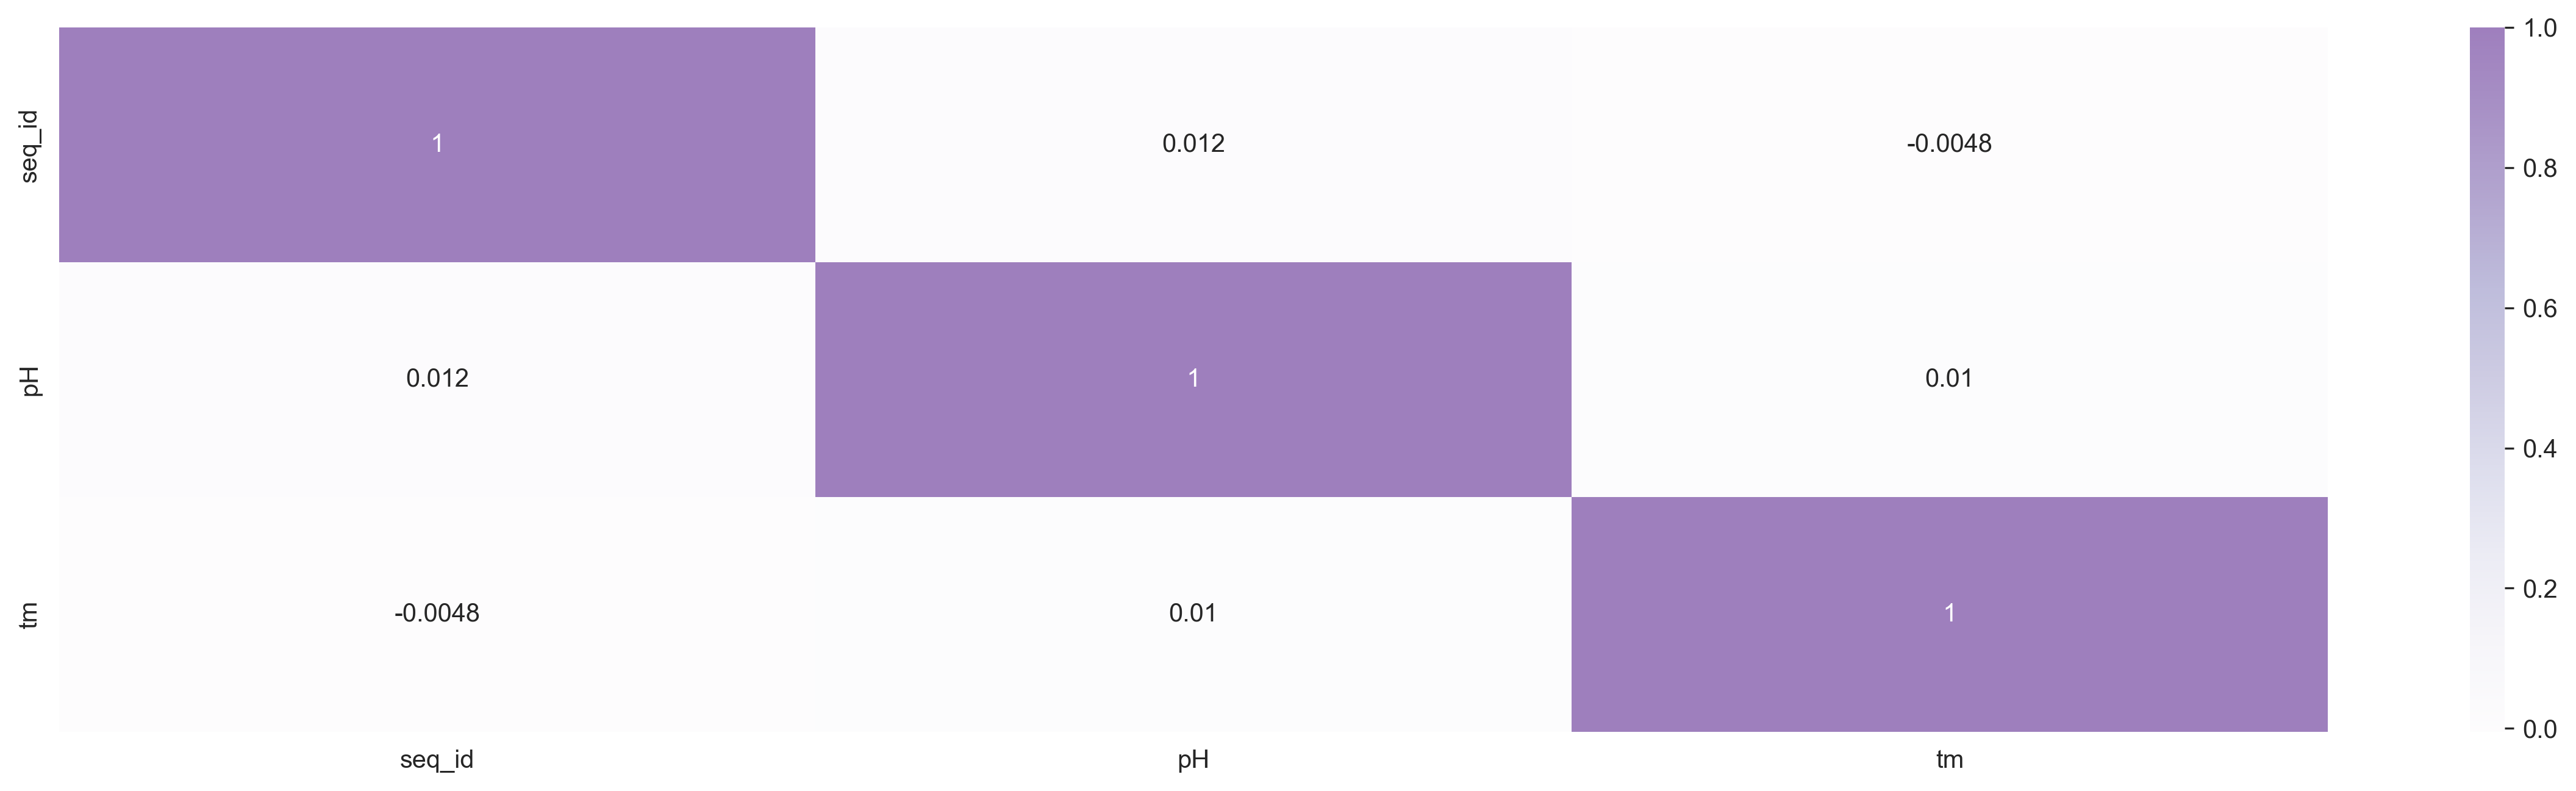

In [52]:
cor = df_train.drop('protein_sequence', axis=1).corr()
ax,fig = plt.subplots(figsize=(20,5),dpi=300)
ax = sns.heatmap(data=cor,annot=True,cmap='Purples',alpha=0.5)

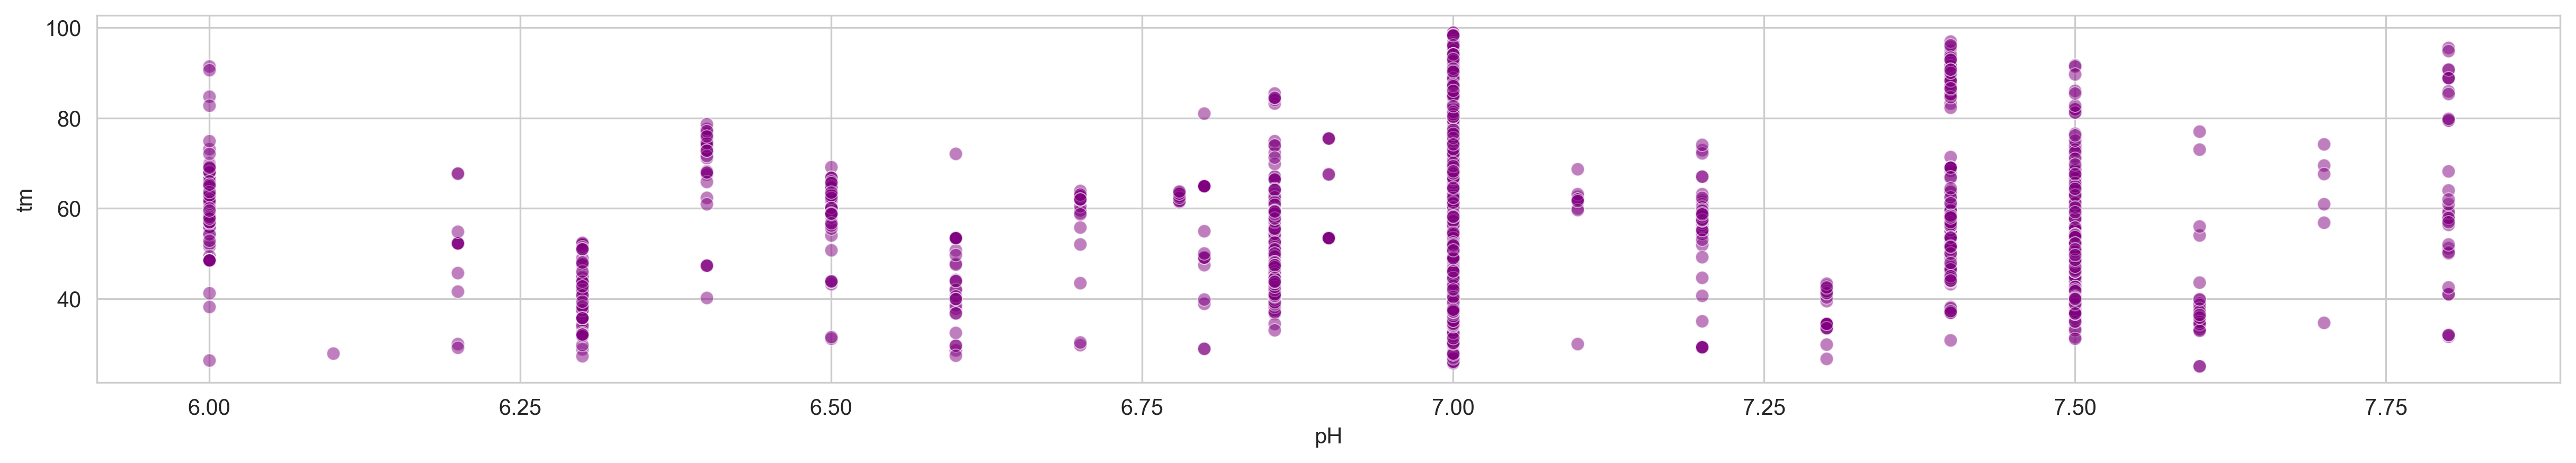

In [53]:
ax,fig = plt.subplots(figsize=(20,3),dpi=300)
ax = sns.scatterplot(x=df_train['pH'], y=df_train['tm'],color='purple',alpha=0.5)

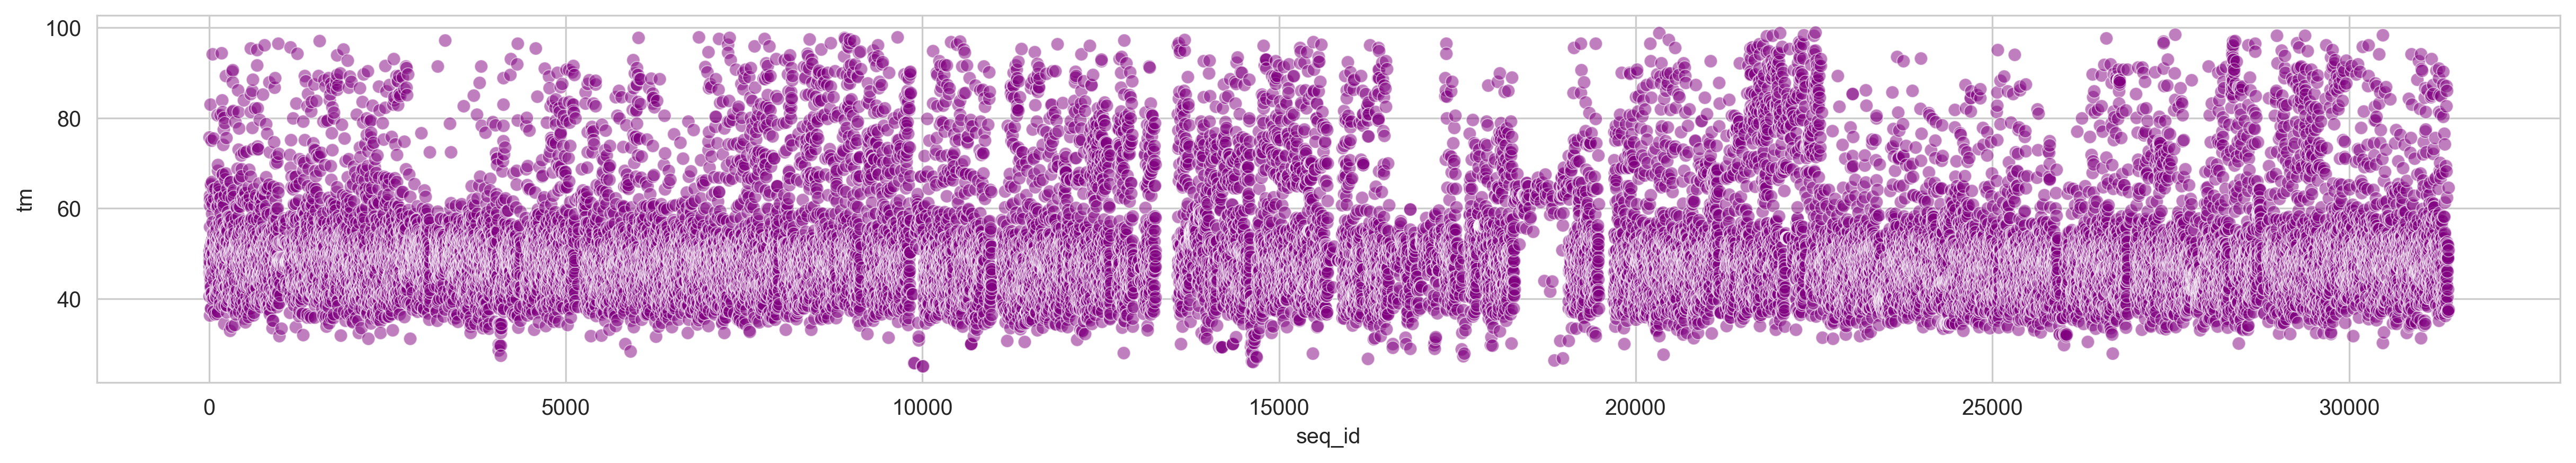

In [54]:
ax,fig = plt.subplots(figsize=(20,3),dpi=300)
ax = sns.scatterplot(x=df_train['seq_id'], y=df_train['tm'],color='purple',alpha=0.5)

In [55]:
df_train

seq_id                                   protein_sequence   pH    tm
0           0  AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0  75.7
1           1  AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0  50.5
2           2  AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0  40.5
3           3  AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...  7.0  47.2
4           4  AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...  7.0  49.5
...       ...                                                ...  ...   ...
31385   31385  YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...  7.0  51.8
31386   31386  YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...  7.0  37.2
31387   31387  YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...  7.0  64.6
31388   31388  YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...  7.0  50.7
31389   31389  YYVPDEYWQSLEVAHKLTFGYGYLTWEWVQGIRSYVYPLLIAGLYK...  7.0  37.6

[26919 rows x 4 columns]

# Feature Engineering & Transformations

In [56]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# Transform, split X,y

In [57]:
X = df_train.drop(['tm'], axis=1)
y = df_train['tm']

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

X_train = X_train.reset_index(drop=True).drop(['seq_id'],axis=1)
y_train = pd.Series(y_train).reset_index(drop=True)

X_test = X_test.reset_index(drop=True).drop(['seq_id'],axis=1)
y_test = pd.Series(y_test).reset_index(drop=True)

z_test = df_test.copy()
z_test = z_test.drop(['seq_id'],axis=1)

print(f'X_train shape: {X_train.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'z_test shape: {z_test.shape}')

X_train shape: (21535, 2)
y_test shape: (5384,)
z_test shape: (2413, 2)


In [59]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [72]:
def transform_df(df):

    ################################ molecular_weight + instability_index + isoelectric_point + length ################################
    for i in tqdm(range(len(df))):
        analysed_seq = ProteinAnalysis(df['protein_sequence'][i])
        # df.loc[i,'molecular_weight'] = analysed_seq.molecular_weight()
        df.loc[i,'instability_index'] = analysed_seq.instability_index()
        df.loc[i,'isoelectric_point'] = analysed_seq.isoelectric_point()
        # df.loc[i,'length'] = analysed_seq.length
    ################################## get_amino_acids_percent the data ################################
    df_zeros = pd.DataFrame(np.zeros((len(df),20)))
    df_zeros.columns = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
    for i in tqdm(range(len(df))):
        analysed_seq = ProteinAnalysis(df['protein_sequence'][i])
        dict = analysed_seq.count_amino_acids()
        df_zeros.iloc[i,:] = dict
    ################################### Merge the dataframes ################################
    df_merged = pd.concat([df,df_zeros],axis=1)

     ################################### add ###################################

    # Create a new column for the percentage of polar amino acids in the protein sequence
    polar_amino_acids = ["R", "H", "K", "D", "E", "S", "T", "N", "Q"]
    def calc_polar_percent(sequence):
        num_polar = sum([1 for aa in sequence if aa in polar_amino_acids])
        return num_polar / len(sequence)
    df_merged["polar_percent"] = df_merged["protein_sequence"].apply(calc_polar_percent)

    # Create a new column for the average hydrophobicity of the amino acids in the protein sequence
    hydrophobicity_scores = {"A": 1.8, "C": 2.5, "D": -3.5, "E": -3.5, "F": 2.8, "G": -0.4, "H": -3.2, "I": 4.5, "K": -3.9, "L": 3.8, "M": 1.9, "N": -3.5, "P": -1.6, "Q": -3.5, "R": -4.5, "S": -0.8, "T": -0.7, "V": 4.2, "W": -0.9, "Y": -1.3}
    def calc_avg_hydrophobicity(sequence):
        hydrophobicity_sum = sum([hydrophobicity_scores[aa] for aa in sequence])
        return hydrophobicity_sum / len(sequence)
    df_merged["avg_hydrophobicity"] = df_merged["protein_sequence"].apply(calc_avg_hydrophobicity)

    # Create a new column for the average mass of the amino acids in the protein sequence
    amino_acid_masses = {"A": 71.04, "C": 103.01, "D": 115.03, "E": 129.04, "F": 147.07, "G": 57.02, "H": 137.06, "I": 113.08, "K": 128.09, "L": 113.08, "M": 131.04, "N": 114.04, "P": 97.05, "Q": 128.06, "R": 156.10, "S": 87.03, "T": 101.05, "V": 99.07, "W": 186.08, "Y": 163.06}
    def calc_avg_mass(sequence):
        mass_sum = sum([amino_acid_masses[aa] for aa in sequence])
        return mass_sum / len(sequence)
    df_merged["avg_mass"] = df_merged["protein_sequence"].apply(calc_avg_mass)

    # ################################### add pH strength ################################
    # df_merged['pH_strength'] = df_merged['pH']
    # for i,p in enumerate(df_merged['pH_strength'].values):
    #     if p < 6 or p > 8:
    #         df_merged.loc[i,'pH_strength'] = 0
    #     else: df_merged.loc[i,'pH_strength'] = 1

    ################################ output ################################
    return df_merged

In [73]:
X_train_transformed = transform_df(X_train)
X_test_transformed = transform_df(X_test)
X_valid_transformed = transform_df(z_test)

100%|██████████| 2413/2413 [00:00<00:00, 9251.13it/s]


In [74]:
X_train_transformed

protein_sequence   pH  \
0      MPIKRLDTVVVNTGSQNDQHSASVPPVYLSTTFKVDLNNEDAQNYD...  7.0   
1      MPAFFVKAGAKKSGGGAAATRKRKNGGKSDAKSEEMAAKMSRRQKI...  7.0   
2      GELKPTAPPIFTGRPFVVAWNVPTQECAPRHKVPLDLRAFDVKATP...  7.0   
3      MKAGKSERERSGRRRHRSGDALTTVVVKQERLSPEPVAHRRPDAPA...  7.0   
4      MAALTMQFEGEKKNVSEVADVTLKQEDEQQERRSYSTPFREERDTF...  7.0   
...                                                  ...  ...   
21530  NVYSCAGSVKSTSPVDYSQLKVRLLTLEGHMKHEEEVNPSNGYFMI...  7.0   
21531  MSENTFIFPATFMWGTSTSSYQIEGGTDEGGRTPSIWDTFCQIPGK...  7.5   
21532  MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAL...  6.7   
21533  MPTIGVKRDLLFEALGKTYTDDEFQDLCFAFGLELDEVTTEKQMLT...  7.0   
21534  QLAAMTIDLGTQFLKIGIVKPGIPMDIALNTESRRKTPNVVMIQDG...  7.0   

       instability_index  isoelectric_point     A     C     D      E     F  \
0              32.173082           8.216963  19.0  10.0  31.0   18.0  18.0   
1              45.929207           5.401034  46.0   4.0  33.0   47.0  18.0   
2              35.102035           7.714324  38.0  11.0  17.0   23.0  20.0   
3              81.400000           9.887855  22.0   1.0  23.0   40.0   8.0   
4              33.853012           6.007108  50.0   8.0  17.0   42.0  18.0   
...                  ...                ...   ...   ...   ...    ...   ...   
21530          34.352632           6.989002  82.0  16.0  56.0   71.0  48.0   
21531          40.319464           5.060000  26.0   6.0  23.0   41.0  26.0   
21532          31.314024           9.693031  16.0   2.0  10.0    7.0   5.0   
21533          40.342194           5.728029  47.0  13.0  36.0   38.0  26.0   
21534          35.862749           5.840570  65.0   1.0  56.0  101.0  42.0   

          G  ...     Q     R     S     T      V     W     Y  polar_percent  \
0      26.0  ...  15.0  20.0  40.0  28.0   41.0   3.0  12.0       0.491379   
1      47.0  ...  19.0  26.0  47.0  23.0   39.0   9.0  10.0       0.508704   
2      29.0  ...  25.0  31.0  31.0  27.0   35.0  16.0  21.0       0.444690   
3      22.0  ...  17.0  56.0  39.0   9.0   21.0   1.0  11.0       0.617801   
4      39.0  ...  19.0  22.0  33.0  32.0   35.0   2.0   6.0       0.471888   
...     ...  ...   ...   ...   ...   ...    ...   ...   ...            ...   
21530  78.0  ...  35.0  41.0  93.0  81.0  114.0   3.0  28.0       0.486388   
21531  43.0  ...  17.0  18.0  18.0  25.0   15.0  16.0  17.0       0.441964   
21532  10.0  ...   5.0  13.0   6.0  11.0    9.0   3.0   6.0       0.475610   
21533  28.0  ...  26.0  26.0  24.0  41.0   51.0   1.0  20.0       0.443878   
21534  40.0  ...  27.0  40.0  56.0  71.0   65.0   2.0  14.0       0.560976   

       avg_hydrophobicity    avg_mass  
0               -0.209914  111.344892  
1               -0.499807  109.466074  
2               -0.372788  113.666239  
3               -1.429581  115.924424  
4               -0.241767  108.264819  
...                   ...         ...  
21530           -0.251180  108.587514  
21531           -0.372991  114.940960  
21532           -0.352439  113.436402  
21533           -0.072619  111.596276  
21534           -0.621729  112.753636  

[21535 rows x 27 columns]

# Get Levenshtein distance between the sequences

In [75]:
import Levenshtein

In [76]:
wild_type = 'VPVNPEPDATSVENVALKTGSGDSQSDPIKADLEVKGQSALPFDVDCWAILCKGAPNVLQRVNEKTKNSNRDRSGANKGPFKDPQKWGIKALPPKNPSWSAQDFKSPEEYAFASSLQGGTNAILAPVNLASQNSQGGVLNGFYSANKVAQFDPSKPQQTKGTWFQITKFTGAAGPYCKALGSNDKSVCDKNKNIAGDWGFDPAKWAYQYDEKNNKFNYVGK'

In [77]:
def mutation(df,wild_type):
    for i,row in tqdm(enumerate(df['protein_sequence'])):
        # lev_distance = Levenshtein.distance(wild_type,row)
        lev_ratio = Levenshtein.ratio(wild_type,row)
        # lev_jaro = Levenshtein.jaro(wild_type,row)

        # df.loc[i,'lev_distance'] = lev_distance
        df.loc[i,'lev_ratio'] = lev_ratio
        # df.loc[i,'lev_jaro'] = lev_jaro

    ################################### factorize protein sequnces ################################
    df['protein_sequence'] = pd.factorize(df['protein_sequence'])[0]

    return df

In [78]:
X_train_transformed = mutation(X_train_transformed,wild_type)
X_test_transformed = mutation(X_test_transformed,wild_type)
X_valid_transformed = mutation(X_valid_transformed,wild_type)

21535it [00:00, 31135.60it/s]
5384it [00:00, 30557.03it/s]
2413it [00:00, 35228.34it/s]


In [79]:
X_train_transformed

protein_sequence   pH  instability_index  isoelectric_point     A  \
0                     0  7.0          32.173082           8.216963  19.0   
1                     1  7.0          45.929207           5.401034  46.0   
2                     2  7.0          35.102035           7.714324  38.0   
3                     3  7.0          81.400000           9.887855  22.0   
4                     4  7.0          33.853012           6.007108  50.0   
...                 ...  ...                ...                ...   ...   
21530             21041  7.0          34.352632           6.989002  82.0   
21531              8343  7.5          40.319464           5.060000  26.0   
21532             21042  6.7          31.314024           9.693031  16.0   
21533             21043  7.0          40.342194           5.728029  47.0   
21534             21044  7.0          35.862749           5.840570  65.0   

          C     D      E     F     G  ...     R     S     T      V     W  \
0      10.0  31.0   18.0  18.0  26.0  ...  20.0  40.0  28.0   41.0   3.0   
1       4.0  33.0   47.0  18.0  47.0  ...  26.0  47.0  23.0   39.0   9.0   
2      11.0  17.0   23.0  20.0  29.0  ...  31.0  31.0  27.0   35.0  16.0   
3       1.0  23.0   40.0   8.0  22.0  ...  56.0  39.0   9.0   21.0   1.0   
4       8.0  17.0   42.0  18.0  39.0  ...  22.0  33.0  32.0   35.0   2.0   
...     ...   ...    ...   ...   ...  ...   ...   ...   ...    ...   ...   
21530  16.0  56.0   71.0  48.0  78.0  ...  41.0  93.0  81.0  114.0   3.0   
21531   6.0  23.0   41.0  26.0  43.0  ...  18.0  18.0  25.0   15.0  16.0   
21532   2.0  10.0    7.0   5.0  10.0  ...  13.0   6.0  11.0    9.0   3.0   
21533  13.0  36.0   38.0  26.0  28.0  ...  26.0  24.0  41.0   51.0   1.0   
21534   1.0  56.0  101.0  42.0  40.0  ...  40.0  56.0  71.0   65.0   2.0   

          Y  polar_percent  avg_hydrophobicity    avg_mass  lev_ratio  
0      12.0       0.491379           -0.209914  111.344892   0.341606  
1      10.0       0.508704           -0.499807  109.466074   0.311653  
2      21.0       0.444690           -0.372788  113.666239   0.315007  
3      11.0       0.617801           -1.429581  115.924424   0.315091  
4       6.0       0.471888           -0.241767  108.264819   0.331015  
...     ...            ...                 ...         ...        ...  
21530  28.0       0.486388           -0.251180  108.587514   0.243386  
21531  17.0       0.441964           -0.372991  114.940960   0.322870  
21532   6.0       0.475610           -0.352439  113.436402   0.363636  
21533  20.0       0.443878           -0.072619  111.596276   0.309023  
21534  14.0       0.560976           -0.621729  112.753636   0.260018  

[21535 rows x 28 columns]

# Heatmap

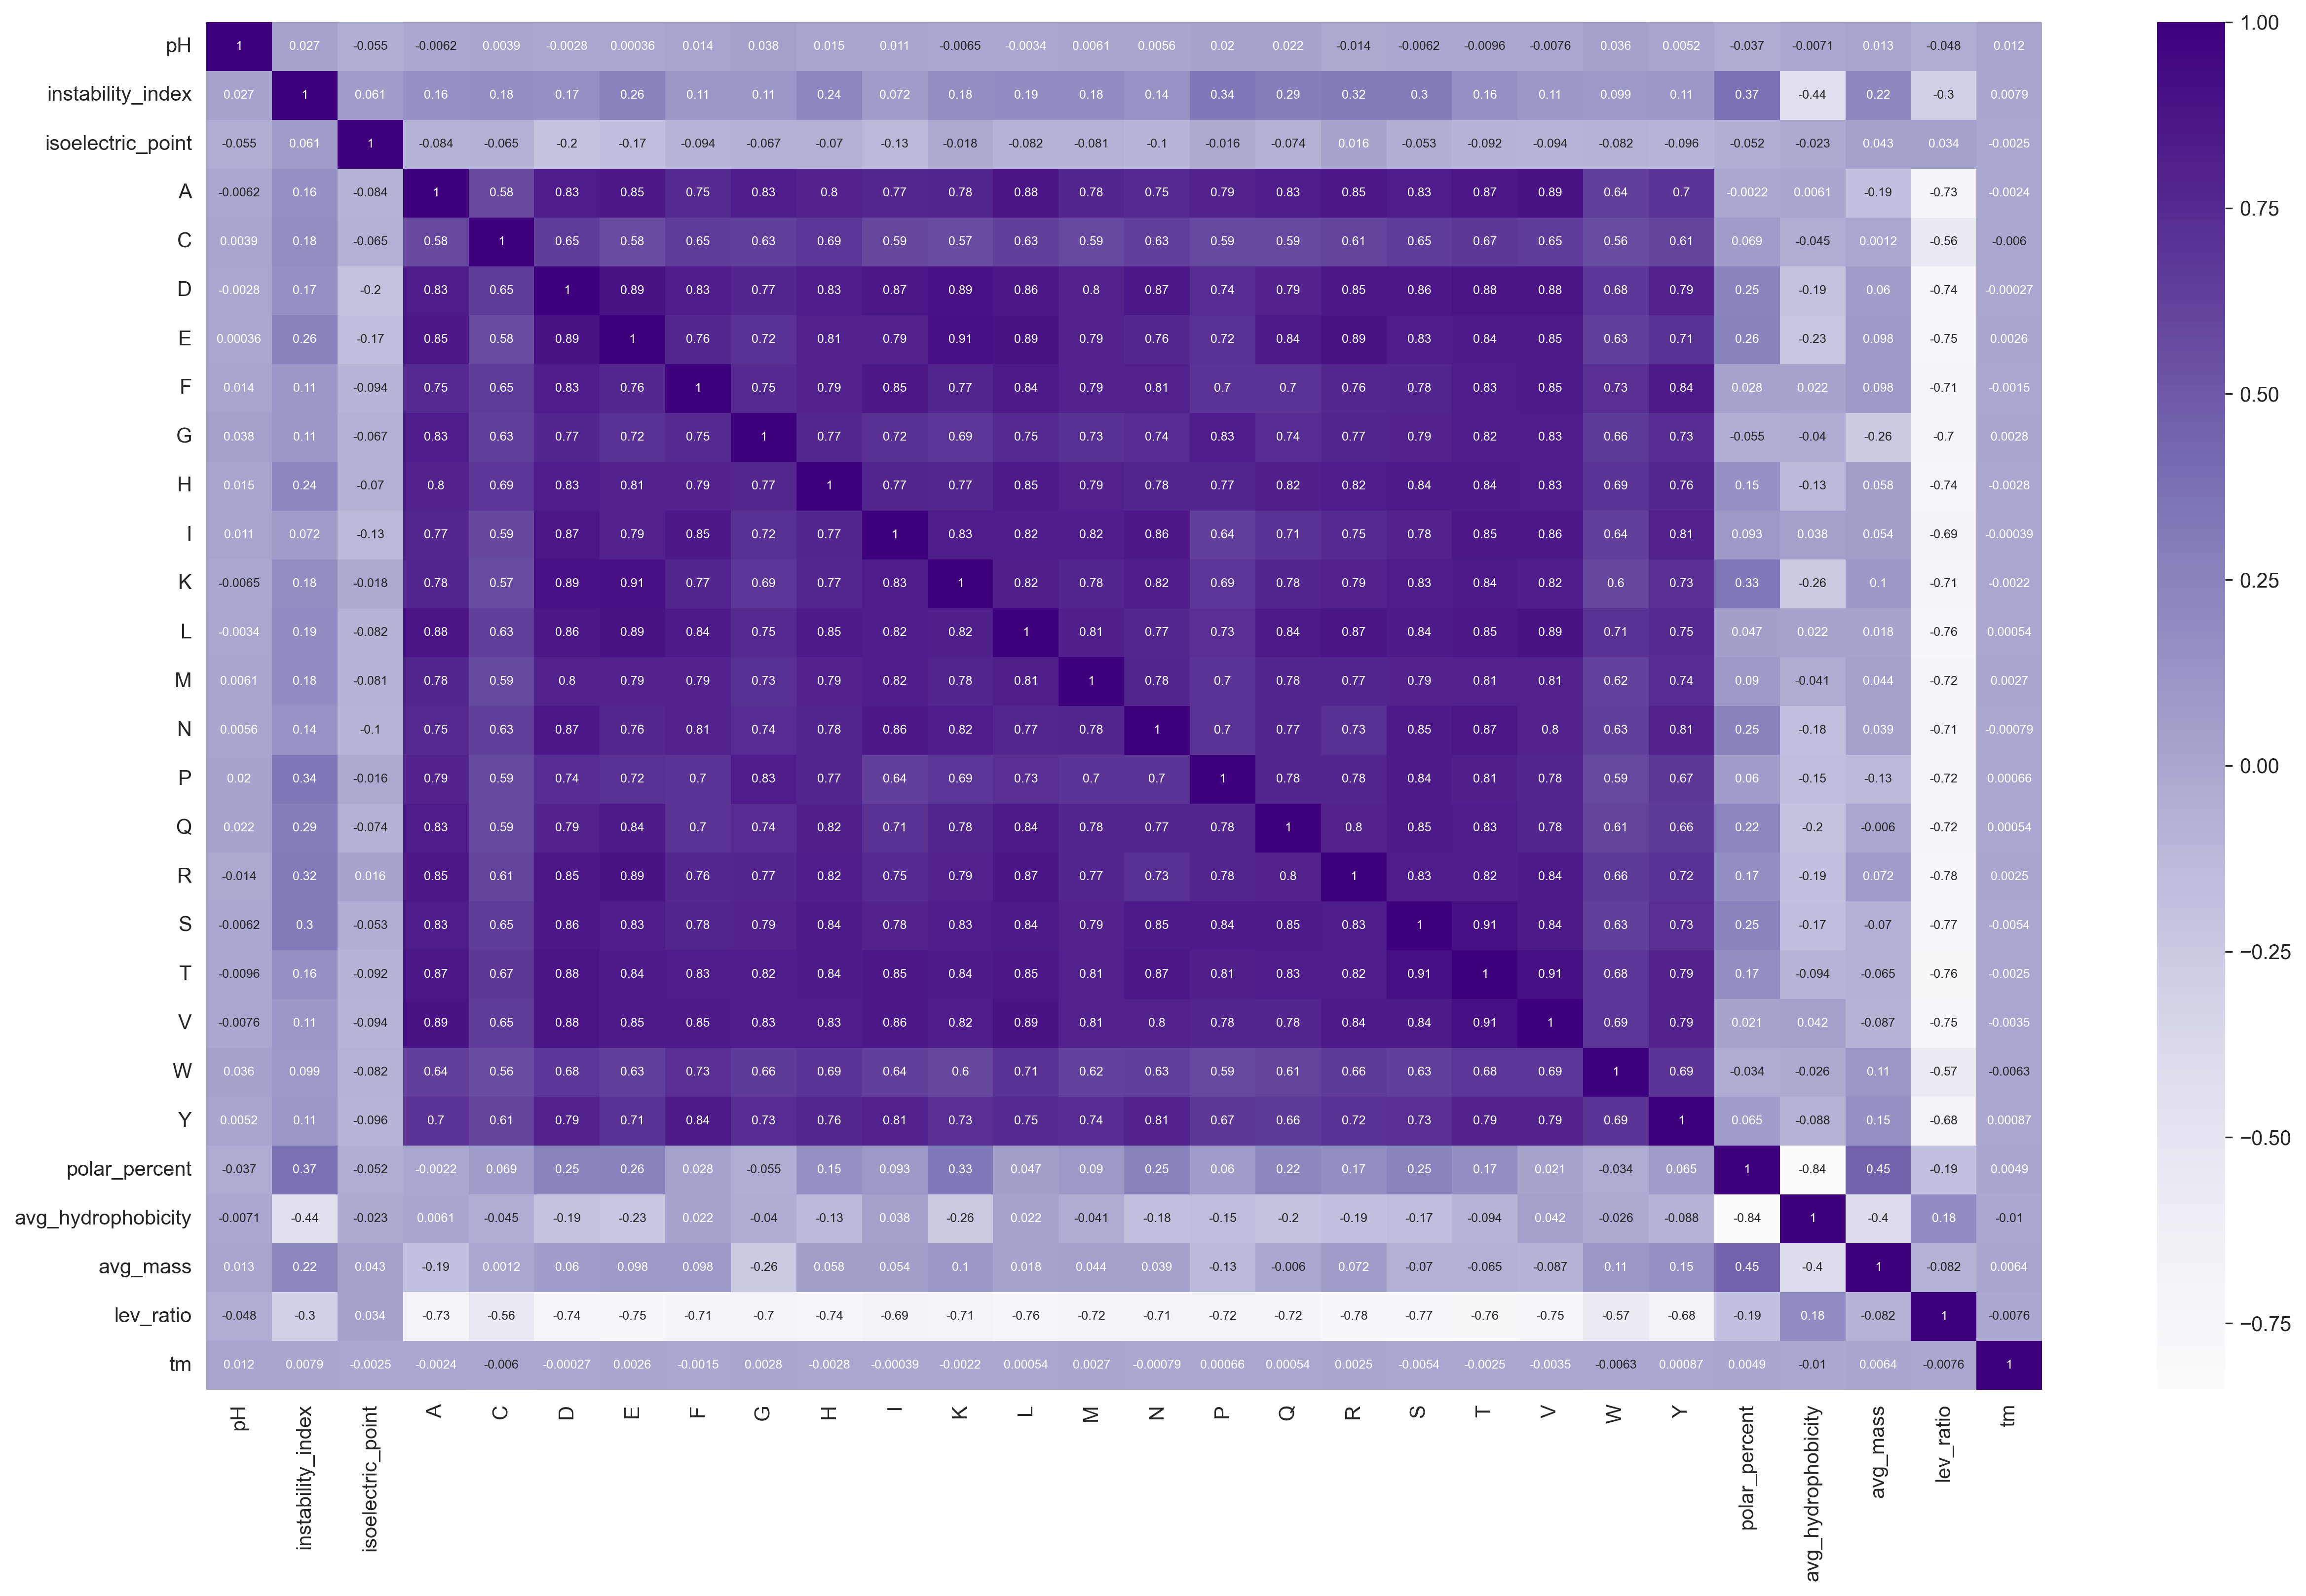

In [80]:
full_df = pd.concat([X_train_transformed.drop(['protein_sequence'],axis=1),y],axis=1)
cor = full_df.corr()
ax,fig = plt.subplots(figsize=(20,12),dpi=300)
ax = sns.heatmap(data=cor,annot=True,cmap='Purples',annot_kws={"size":6});

In [81]:
importance = cor.copy()
importance['tm'] = np.abs(importance['tm'])
importance = importance['tm'].sort_values(ascending=False)
importance = importance.iloc[1:]
importance

pH                    0.012228
avg_hydrophobicity    0.010446
instability_index     0.007893
lev_ratio             0.007616
avg_mass              0.006423
W                     0.006304
C                     0.005986
S                     0.005431
polar_percent         0.004919
V                     0.003478
H                     0.002797
G                     0.002784
M                     0.002650
E                     0.002567
T                     0.002549
R                     0.002532
isoelectric_point     0.002464
A                     0.002448
K                     0.002154
F                     0.001470
Y                     0.000870
N                     0.000788
P                     0.000658
L                     0.000540
Q                     0.000538
I                     0.000389
D                     0.000273
Name: tm, dtype: float64

# Check multicollinearity

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vars = X_train_transformed.copy()

vif = pd.DataFrame()
vif['features'] = vars.columns
vif['vif_Factor'] = [variance_inflation_factor(vars.values, i) for i in range(vars.shape[1])]
vif.loc[vif['vif_Factor'] < 5, 'vif_Factor_Description'] = 'standard'
vif.loc[(vif['vif_Factor'] >= 5) & (vif['vif_Factor'] < 10), 'vif_Factor_Description'] = 'Concerning'
vif.loc[vif['vif_Factor'] >= 10, 'vif_Factor_Description'] = 'Problematic'

vif[vif['vif_Factor_Description'].isna() == False]

features   vif_Factor vif_Factor_Description
0     protein_sequence     3.936794               standard
1                   pH  2019.419857            Problematic
2    instability_index    26.953576            Problematic
3    isoelectric_point    34.299715            Problematic
4                    A    20.224455            Problematic
5                    C     3.269342               standard
6                    D    28.580802            Problematic
7                    E    35.469603            Problematic
8                    F    16.094355            Problematic
9                    G    15.613080            Problematic
10                   H    10.999560            Problematic
11                   I    21.077883            Problematic
12                   K    28.433918            Problematic
13                   L    24.789511            Problematic
14                   M     9.774476             Concerning
15                   N    15.325092            Problematic
16                   P    11.759092            Problematic
17                   Q    10.186498            Problematic
18                   R    22.236008            Problematic
19                   S    21.470676            Problematic
20                   T    26.133402            Problematic
21                   V    27.070876            Problematic
22                   W     5.061501             Concerning
23                   Y    12.532785            Problematic
24       polar_percent   563.091260            Problematic
25  avg_hydrophobicity    16.417813            Problematic
26            avg_mass  2450.965272            Problematic
27           lev_ratio   158.753150            Problematic

# Drop the problematic variables

In [87]:
vars = X_train_transformed.copy()
vars = vars.drop(['polar_percent','avg_mass','lev_ratio','pH','instability_index','H','V','E','D','T','I','L','A','S','F','N'],axis=1)

In [88]:
vif = pd.DataFrame()
vif['features'] = vars.columns
vif['vif_Factor'] = [variance_inflation_factor(vars.values, i) for i in range(vars.shape[1])]
vif.loc[vif['vif_Factor'] < 5, 'vif_Factor_Description'] = 'standard'
vif.loc[(vif['vif_Factor'] >= 5) & (vif['vif_Factor'] < 10), 'vif_Factor_Description'] = 'Concerning'
vif.loc[vif['vif_Factor'] >= 10, 'vif_Factor_Description'] = 'Problematic'

vif[vif['vif_Factor_Description'].isna() == False]

features  vif_Factor vif_Factor_Description
0     protein_sequence    3.473566               standard
1    isoelectric_point    4.925626               standard
2                    C    2.755510               standard
3                    G    9.732611             Concerning
4                    K    8.279377             Concerning
5                    M    8.336235             Concerning
6                    P    7.175013             Concerning
7                    Q    6.941860             Concerning
8                    R    9.312056             Concerning
9                    W    4.088060               standard
10                   Y    7.626618             Concerning
11  avg_hydrophobicity    2.342360               standard

In [89]:
X_train_transformed = X_train_transformed.filter(vars)
X_test_transformed = X_test_transformed.filter(vars)
X_valid_transformed = X_valid_transformed.filter(vars)

In [90]:
X_train_transformed

protein_sequence  isoelectric_point     C     G      K     M     P  \
0                     0           8.216963  10.0  26.0   32.0  10.0  21.0   
1                     1           5.401034   4.0  47.0   39.0   8.0  13.0   
2                     2           7.714324  11.0  29.0   10.0   4.0  27.0   
3                     3           9.887855   1.0  22.0   25.0   4.0  27.0   
4                     4           6.007108   8.0  39.0   29.0  15.0  22.0   
...                 ...                ...   ...   ...    ...   ...   ...   
21530             21041           6.989002  16.0  78.0   84.0  13.0  56.0   
21531              8343           5.060000   6.0  43.0   18.0  15.0  18.0   
21532             21042           9.693031   2.0  10.0   13.0   5.0   3.0   
21533             21043           5.728029  13.0  28.0   39.0  10.0  33.0   
21534             21044           5.840570   1.0  40.0  104.0  20.0  31.0   

          Q     R     W     Y  avg_hydrophobicity  
0      15.0  20.0   3.0  12.0           -0.209914  
1      19.0  26.0   9.0  10.0           -0.499807  
2      25.0  31.0  16.0  21.0           -0.372788  
3      17.0  56.0   1.0  11.0           -1.429581  
4      19.0  22.0   2.0   6.0           -0.241767  
...     ...   ...   ...   ...                 ...  
21530  35.0  41.0   3.0  28.0           -0.251180  
21531  17.0  18.0  16.0  17.0           -0.372991  
21532   5.0  13.0   3.0   6.0           -0.352439  
21533  26.0  26.0   1.0  20.0           -0.072619  
21534  27.0  40.0   2.0  14.0           -0.621729  

[21535 rows x 12 columns]

In [91]:
X_test_transformed

protein_sequence  isoelectric_point    C     G     K     M     P     Q  \
0                    0           6.814393  1.0  32.0  21.0   7.0  23.0  16.0   
1                    1           6.015293  7.0  29.0  25.0   5.0   7.0  12.0   
2                    2           5.918212  7.0  30.0  21.0  12.0  30.0  13.0   
3                    3           4.432100  4.0  13.0  11.0   7.0   8.0   6.0   
4                    4           4.381627  2.0   8.0   0.0   0.0   6.0   5.0   
...                ...                ...  ...   ...   ...   ...   ...   ...   
5379              5339           5.733145  1.0  10.0  17.0   5.0   9.0  10.0   
5380              5340           8.348865  9.0  18.0  15.0   8.0  15.0   9.0   
5381              5341           9.578277  0.0  19.0  24.0   8.0   8.0  10.0   
5382              5342           5.810048  3.0  22.0  12.0   5.0  22.0   7.0   
5383              5343           8.904325  5.0  33.0  42.0  15.0  19.0   4.0   

         R     W     Y  avg_hydrophobicity  
0     25.0  15.0  36.0           -0.566150  
1     11.0   6.0  11.0           -0.574534  
2     34.0   1.0  16.0           -0.382430  
3      5.0   0.0   9.0           -0.190256  
4      5.0   0.0   8.0           -0.351042  
...    ...   ...   ...                 ...  
5379  12.0   4.0   9.0           -0.513182  
5380  23.0   1.0   4.0           -0.169836  
5381  10.0   5.0   5.0            0.360678  
5382  18.0   0.0   9.0           -0.637238  
5383  13.0   3.0   9.0           -0.160911  

[5384 rows x 12 columns]

In [92]:
X_valid_transformed

protein_sequence  isoelectric_point    C     G     K    M     P     Q  \
0                    0           8.751535  4.0  19.0  24.0  0.0  17.0  13.0   
1                    1           9.024494  4.0  19.0  25.0  0.0  17.0  13.0   
2                    2           8.907484  4.0  19.0  24.0  0.0  17.0  13.0   
3                    3           8.699638  5.0  19.0  23.0  0.0  17.0  13.0   
4                    4           8.761012  4.0  19.0  23.0  0.0  17.0  13.0   
...                ...                ...  ...   ...   ...  ...   ...   ...   
2408              2408           8.907484  4.0  19.0  24.0  0.0  17.0  13.0   
2409              2409           8.907484  4.0  19.0  24.0  0.0  17.0  13.0   
2410              2410           8.907484  4.0  19.0  24.0  0.0  17.0  13.0   
2411              2411           8.907484  4.0  19.0  24.0  0.0  18.0  13.0   
2412              2412           8.907484  4.0  19.0  24.0  0.0  17.0  13.0   

        R    W    Y  avg_hydrophobicity  
0     3.0  6.0  6.0           -0.771041  
1     3.0  6.0  6.0           -0.772851  
2     3.0  6.0  6.0           -0.758636  
3     3.0  6.0  6.0           -0.709050  
4     3.0  6.0  6.0           -0.707692  
...   ...  ...  ...                 ...  
2408  3.0  6.0  6.0           -0.725792  
2409  3.0  6.0  6.0           -0.728959  
2410  3.0  6.0  6.0           -0.761991  
2411  3.0  6.0  6.0           -0.753394  
2412  3.0  7.0  6.0           -0.750226  

[2413 rows x 12 columns]

# Apply standardization & PCA

In [97]:
def transform_standard(X_train,X_test,X_valid):

    ################################ Transformers ################################
    scaler = StandardScaler()
    from sklearn.decomposition import PCA
    model_PCA = PCA(n_components=9)
    ################################ Training dataframe ################################

    ### Apply Standard scaler normalization to the data ###
    df_scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    print(f'Shape of scaled dataframes = {df_scaled_X_train.shape}')
    display(df_scaled_X_train.head(1))
    print('-'*80)

    ## Apply principal component analysis to reduce the columns ###
    df_decomposed_X_train = pd.DataFrame(model_PCA.fit_transform(df_scaled_X_train))
    print('*'*80)
    print(model_PCA.explained_variance_ratio_)
    print('*'*80)
    print(f'Shape of PCA = {df_decomposed_X_train.shape}')
    print('-'*80)

    ################################ testing dataframe ################################

    ### Apply Standard scaler normalization to the data ###
    df_scaled_X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    print(f'Shape of scaled dataframes = {df_scaled_X_test.shape}')
    display(df_scaled_X_test.head(1))
    print('-'*80)

    ## Apply principal component analysis to reduce the columns ###
    df_decomposed_X_test = pd.DataFrame(model_PCA.transform(df_scaled_X_test))
    print('*'*80)
    print(model_PCA.explained_variance_ratio_)
    print('*'*80)
    print(f'Shape of PCA = {df_decomposed_X_test.shape}')
    print('-'*80)

    ################################ validation dataframe ################################

    ### Apply Standard scaler normalization to the data ###
    df_scaled_X_valid = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns)
    print(f'Shape of scaled dataframes = {df_scaled_X_valid.shape}')
    display(df_scaled_X_valid.head(1))
    print('-'*80)

    ## Apply principal component analysis to reduce the columns ###
    df_decomposed_X_valid = pd.DataFrame(model_PCA.transform(df_scaled_X_valid))
    print('*'*80)
    print(model_PCA.explained_variance_ratio_)
    print('*'*80)
    print(f'Shape of PCA = {df_decomposed_X_valid.shape}')
    print('-'*80)

    ################################ Output ################################

    return df_decomposed_X_train,df_decomposed_X_test,df_decomposed_X_valid

In [98]:
X_train_transformed,X_test_transformed,X_valid_transformed = transform_standard(X_train_transformed,X_test_transformed,X_valid_transformed)

Shape of scaled dataframes = (21535, 12)


protein_sequence  isoelectric_point         C         G         K  \
0         -1.710174            0.93889  0.306831 -0.178283  0.111377   

          M         P         Q         R         W         Y  \
0 -0.083605 -0.098303 -0.206708 -0.199939 -0.368077 -0.137745   

   avg_hydrophobicity  
0            0.356213

--------------------------------------------------------------------------------
********************************************************************************
[0.54745808 0.09160418 0.0835497  0.08087716 0.04301456 0.03832125
 0.0331561  0.02547039 0.01592793]
********************************************************************************
Shape of PCA = (21535, 9)
--------------------------------------------------------------------------------
Shape of scaled dataframes = (5384, 12)


protein_sequence  isoelectric_point         C         G         K  \
0         -1.710174           0.093081 -0.564884  0.036627 -0.272279   

          M         P         Q         R         W         Y  \
0 -0.377555 -0.025801 -0.168792  0.000789  1.713792  1.828837   

   avg_hydrophobicity  
0           -0.743878

--------------------------------------------------------------------------------
********************************************************************************
[0.54745808 0.09160418 0.0835497  0.08087716 0.04301456 0.03832125
 0.0331561  0.02547039 0.01592793]
********************************************************************************
Shape of PCA = (5384, 9)
--------------------------------------------------------------------------------
Shape of scaled dataframes = (2413, 12)


protein_sequence  isoelectric_point         C        G         K         M  \
0         -1.710174            1.26126 -0.274313 -0.42901 -0.167645 -1.063438   

          P         Q         R        W         Y  avg_hydrophobicity  
0 -0.243307 -0.282541 -0.882411  0.15239 -0.629391           -1.376598

--------------------------------------------------------------------------------
********************************************************************************
[0.54745808 0.09160418 0.0835497  0.08087716 0.04301456 0.03832125
 0.0331561  0.02547039 0.01592793]
********************************************************************************
Shape of PCA = (2413, 9)
--------------------------------------------------------------------------------


# Build a regression base model

In [99]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train_transformed,y_train)

y_pred = model_LR.predict(X_test_transformed)

In [122]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

mae = round(mean_absolute_error(y_test,y_pred),3)
print(f'MAE = {mae}')
print('-'*80)

mse = round(mean_squared_error(y_test,y_pred),3)
print(f'MSE = {mse}')
print('-'*80)

rmse = round(np.sqrt(mean_squared_error(y_test,y_pred)),3)
print(f'RMSE = {rmse}')
print('-'*80)

MAE = 8.469
--------------------------------------------------------------------------------
MSE = 131.082
--------------------------------------------------------------------------------
RMSE = 11.449
--------------------------------------------------------------------------------


# Build an XGBM model

In [76]:
#!pip install XGboost,lightgbm

In [101]:
import xgboost as xgb


xgb_model = xgb.XGBRegressor(n_estimators=1250,max_depth=10,learning_rate=0.05)
xgb_model.fit(X_train_transformed,y_train)

y_pred_lgb = xgb_model.predict(X_test_transformed)

In [121]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

mae = round(mean_absolute_error(y_test,y_pred_lgb),3)
print(f'MAE = {mae}')
print('-'*80)

mse = round(mean_squared_error(y_test,y_pred_lgb),3)
print(f'MSE = {mse}')
print('-'*80)

rmse = round(np.sqrt(mean_squared_error(y_test,y_pred_lgb)),3)
print(f'RMSE = {rmse}')
print('-'*80)

MAE = 6.788
--------------------------------------------------------------------------------
MSE = 87.425
--------------------------------------------------------------------------------
RMSE = 9.35
--------------------------------------------------------------------------------


# Neural network

In [103]:
X_train_transformed

0         1         2         3         4         5         6  \
0     -0.359769  0.207406 -1.359392  1.409520  0.124519  0.292972 -0.409025   
1      0.151658 -0.091719 -1.897449 -0.349975  0.134757 -0.464121  0.466580   
2      0.571518 -0.016529 -1.498556  1.079714  1.407282 -0.880639  1.109900   
3     -0.255406  4.023879 -1.824778  0.299147  0.255606  0.057594  0.495151   
4     -0.203239 -0.409414 -1.660237  0.322541 -0.465207  0.612668 -0.284453   
...         ...       ...       ...       ...       ...       ...       ...   
21530  2.651892  0.142941  1.764010 -0.145223 -0.354547  0.770857 -0.249712   
21531  0.615940 -0.930372 -0.540045 -0.593055  0.761465 -1.182975  0.836507   
21532 -1.755232  1.161431  2.046660  0.802389  0.310302 -0.262561 -0.111452   
21533  0.366917 -0.739248  1.669553 -0.602094 -0.150375  0.687248 -0.593665   
21534  1.467111  1.084347  1.352331 -1.502975 -1.312271 -0.385383 -1.137018   

              7         8  
0     -0.082026  0.084809  
1      0.292664  0.405098  
2      0.501782 -0.057719  
3     -0.252416  0.268521  
4      0.149653 -0.120859  
...         ...       ...  
21530 -1.168985  0.958518  
21531  0.411561 -0.604886  
21532  0.142116 -0.129636  
21533 -0.460527  0.364060  
21534 -0.288732  0.939600  

[21535 rows x 9 columns]

In [104]:
y_train.shape

(21535,)

### Dense network

In [105]:
X_train_transformed

0         1         2         3         4         5         6  \
0     -0.359769  0.207406 -1.359392  1.409520  0.124519  0.292972 -0.409025   
1      0.151658 -0.091719 -1.897449 -0.349975  0.134757 -0.464121  0.466580   
2      0.571518 -0.016529 -1.498556  1.079714  1.407282 -0.880639  1.109900   
3     -0.255406  4.023879 -1.824778  0.299147  0.255606  0.057594  0.495151   
4     -0.203239 -0.409414 -1.660237  0.322541 -0.465207  0.612668 -0.284453   
...         ...       ...       ...       ...       ...       ...       ...   
21530  2.651892  0.142941  1.764010 -0.145223 -0.354547  0.770857 -0.249712   
21531  0.615940 -0.930372 -0.540045 -0.593055  0.761465 -1.182975  0.836507   
21532 -1.755232  1.161431  2.046660  0.802389  0.310302 -0.262561 -0.111452   
21533  0.366917 -0.739248  1.669553 -0.602094 -0.150375  0.687248 -0.593665   
21534  1.467111  1.084347  1.352331 -1.502975 -1.312271 -0.385383 -1.137018   

              7         8  
0     -0.082026  0.084809  
1      0.292664  0.405098  
2      0.501782 -0.057719  
3     -0.252416  0.268521  
4      0.149653 -0.120859  
...         ...       ...  
21530 -1.168985  0.958518  
21531  0.411561 -0.604886  
21532  0.142116 -0.129636  
21533 -0.460527  0.364060  
21534 -0.288732  0.939600  

[21535 rows x 9 columns]

In [107]:
import tensorflow as tf

tf_model = tf.keras.Sequential()
tf_model.add(tf.keras.layers.Dense(units=64,input_shape=[X_train_transformed.shape[1]],kernel_regularizer=tf.keras.regularizers.l1_l2(0.1)))
tf_model.add(tf.keras.layers.Dropout(0.3))
tf_model.add(tf.keras.layers.Dense(128,activation='relu'))
tf_model.add(tf.keras.layers.Dropout(0.3))
tf_model.add(tf.keras.layers.Dense(512,activation='relu'))
tf_model.add(tf.keras.layers.Dropout(0.3))
tf_model.add(tf.keras.layers.Dense(512,activation='relu'))
tf_model.add(tf.keras.layers.Dropout(0.3))
tf_model.add(tf.keras.layers.Dense(512,activation='relu'))
tf_model.add(tf.keras.layers.Dropout(0.3))

tf_model.add(tf.keras.layers.Dense(1))

tf_model.compile(tf.keras.optimizers.Adam(0.00001),loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()])

print(f'Input shape: {tf_model.input_shape}')
tf_model.summary()

Input shape: (None, 9)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               66048     
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (Non

In [108]:
callbacks_list = tf.keras.callbacks.EarlyStopping(monitor="root_mean_squared_error",patience=15)
history = tf_model.fit(X_train_transformed,y_train,epochs=500,callbacks=[callbacks_list],validation_split=0.2)

Epoch 1/500


2023-01-19 12:10:17.235945: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


539/539 [==============================] - 3s 5ms/step - loss: 2201.6296 - root_mean_squared_error: 46.8325 - val_loss: 1200.2001 - val_root_mean_squared_error: 34.5216
Epoch 2/500
539/539 [==============================] - 3s 5ms/step - loss: 663.1423 - root_mean_squared_error: 25.5861 - val_loss: 578.4308 - val_root_mean_squared_error: 23.8731
Epoch 3/500
539/539 [==============================] - 3s 5ms/step - loss: 540.6088 - root_mean_squared_error: 23.0671 - val_loss: 480.7749 - val_root_mean_squared_error: 21.7314
Epoch 4/500
539/539 [==============================] - 3s 5ms/step - loss: 493.2772 - root_mean_squared_error: 22.0170 - val_loss: 421.8268 - val_root_mean_squared_error: 20.3296
Epoch 5/500
539/539 [==============================] - 3s 5ms/step - loss: 456.1703 - root_mean_squared_error: 21.1573 - val_loss: 370.2618 - val_root_mean_squared_error: 19.0189
Epoch 6/500
539/539 [==============================] - 3s 5ms/step - loss: 413.7067 - root_mean_squared_error: 20.1

In [109]:
tf_model.evaluate(X_train_transformed,y_train)

673/673 [==============================] - 1s 772us/step - loss: 119.0888 - root_mean_squared_error: 10.5882


[119.08882904052734, 10.588189125061035]

In [110]:
tf_model.evaluate(X_test_transformed,y_test)

169/169 [==============================] - 0s 867us/step - loss: 122.5066 - root_mean_squared_error: 10.7484


[122.50658416748047, 10.748373985290527]

In [111]:
tf_pred = tf_model.predict(X_test_transformed)

169/169 [==============================] - 0s 823us/step


In [113]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error

r2 = r2_score(y_test,tf_pred)
rmse = round(np.sqrt(mean_squared_error(y_test,tf_pred)),3)

print(f'rmse: {rmse}')

rmse: 10.748


In [114]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

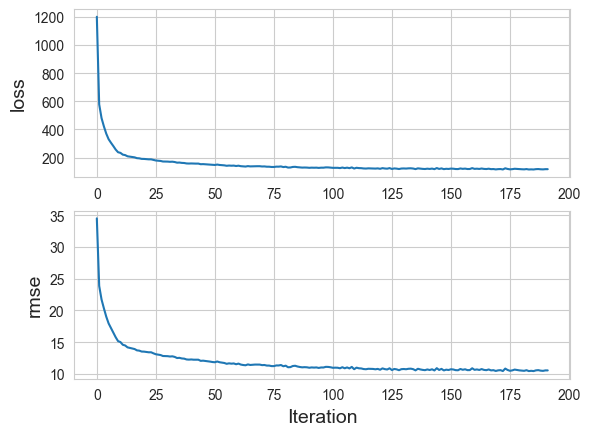

In [115]:
history_dict = history.history
history_dict.keys() # to get the loss names
loss_values = history_dict['val_loss']
acc_values = history_dict['val_root_mean_squared_error']
epochs = range(1, len(loss_values) + 1)

fig, axes = plt.subplots(2)
axes[0].set_ylabel("loss", fontsize=14)
axes[0].plot(loss_values)
axes[1].set_ylabel("rmse", fontsize=14)
axes[1].set_xlabel("Iteration", fontsize=14)
axes[1].plot(acc_values)
plt.show()

# Predict the validation data

In [123]:
#X_valid_tensor = create_dataset_valid(X_valid_transformed)

y_pred_tf = xgb_model.predict(X_valid_transformed)
y_pred_tf.shape

(2413,)

# Build final dataframe

In [124]:
submission = sample_df.copy()
submission.shape

(2413, 1)

In [125]:
submission['tm'] = y_pred_tf
submission = submission.loc[:,['seq_id','tm']]
submission

seq_id         tm
0      31390  54.868431
1      31391  57.123974
2      31392  51.462265
3      31393  56.832706
4      31394  54.820713
...      ...        ...
2408   33798  61.136848
2409   33799  60.673393
2410   33800  57.810696
2411   33801  58.215820
2412   33802  51.856590

[2413 rows x 2 columns]

# Save the final file

In [126]:
submission.to_csv('submission.csv',index=False)

In [127]:
print(submission['tm'].min())
print(submission['tm'].max())

48.985928
68.05599
